In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [ ]:

# Load the data
county_cavan = pd.read_csv("data/dly675_cavan-ballyhaise.csv")
county_cavan["date"] = pd.to_datetime(county_cavan["date"])
county_cavan = county_cavan[(county_cavan["date"].dt.year >= 2013) & (county_cavan["date"].dt.year <= 2023)]


In [ ]:
county_cavan = county_cavan.loc[:, ~county_cavan.columns.str.startswith(('ind', 'file','igmin'))]

In [ ]:
import pandas as pd
import numpy as np
import re

# Function to replace NaN values and occurrences of r'\s+' with mean value of the column for the month and year of the date related to that row
def replace_nan_and_whitespace_with_mean(df):
    for column in df.columns:
        if column != 'date':
            # Replace occurrences of r'\s+' with NaN
            df[column] = df[column].apply(lambda x: x if not (isinstance(x, str) and re.search(r'\s+', x)) else np.nan)
            # Ensure all values are numeric
            df[column] = pd.to_numeric(df[column], errors='coerce')
            # Replace NaN values with mean value of the column for the month and year of the date related to that row, approximated to the first decimal number
            df[column] = df.apply(lambda row: row[column] if not pd.isna(row[column]) else round(df[(df['date'].dt.year == row['date'].year) & (df['date'].dt.month == row['date'].month)][column].mean(), 1), axis=1)
            # Round all float numbers to the first decimal point
            df[column] = df[column].round(1)
    return df

# Replace NaN values and occurrences of r'\s+' with mean values
county_cavan = replace_nan_and_whitespace_with_mean(county_cavan)

#filtered_df = county_cavan.query("date == '2013-07-10' or date == '2013-05-14' or date == '2013-07-11'")

#print(filtered_df)


In [ ]:
county_cavan = county_cavan.loc[:, ~county_cavan.columns.str.startswith(('ind', 'file','igmin'))]

In [ ]:
county_cavan[["glorad","hm","ddhm"]] = county_cavan[["glorad","hm","ddhm"]].astype("int64")
# Convert multiple columns to float data type
columns_to_convert = ["gmin", "rain", "cbl", "wdsp", "soil", "pe", "evap", "smd_wd", "smd_md", "smd_pd"]
county_cavan[columns_to_convert] = county_cavan[columns_to_convert].astype(float)


In [ ]:
print(county_cavan.dtypes)

date      datetime64[ns]
maxtp            float64
mintp            float64
gmin             float64
rain             float64
cbl              float64
wdsp             float64
hm                 int64
ddhm               int64
hg                 int64
soil             float64
pe               float64
evap             float64
smd_wd           float64
smd_md           float64
smd_pd           float64
glorad             int64
dtype: object


In [ ]:
county_cavan.to_parquet('county_cavan.parquet')

In [ ]:
county_cavan.head()

,date,maxtp,mintp,gmin,rain,cbl,wdsp,hm,ddhm,hg,soil,pe,evap,smd_wd,smd_md,smd_pd,glorad
3359,2013-01-01,7.1,2.6,0.8,0.1,1003.3,9.8,15,270,21,3.9,0.4,0.4,0.3,0.3,-9.2,342
3360,2013-01-02,12.6,5.5,1.7,0.0,1015.7,7.5,14,260,21,6.8,0.5,0.6,0.7,0.7,-8.3,168
3361,2013-01-03,12.9,9.3,8.2,0.0,1023.5,7.3,14,210,19,8.7,0.3,0.4,1.1,1.1,-7.6,283
3362,2013-01-04,10.7,8.2,7.2,0.0,1026.1,8.0,16,170,23,8.3,0.6,0.8,1.7,1.7,-6.6,82
3363,2013-01-05,11.1,8.3,8.0,0.1,1022.6,8.6,15,190,22,8.6,0.5,0.6,2.0,2.0,-5.9,96


Rainfall Amount Prediction Using LSTM


Training and evaluating model with 7 days of previous rain data:


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


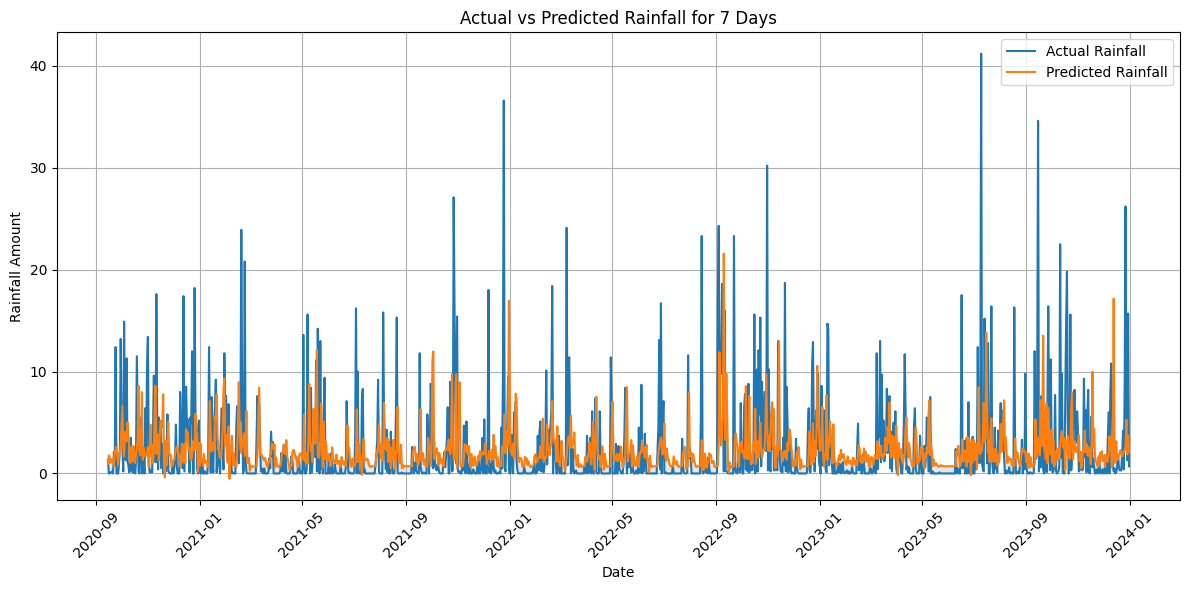


Training and evaluating model with 14 days of previous rain data:


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


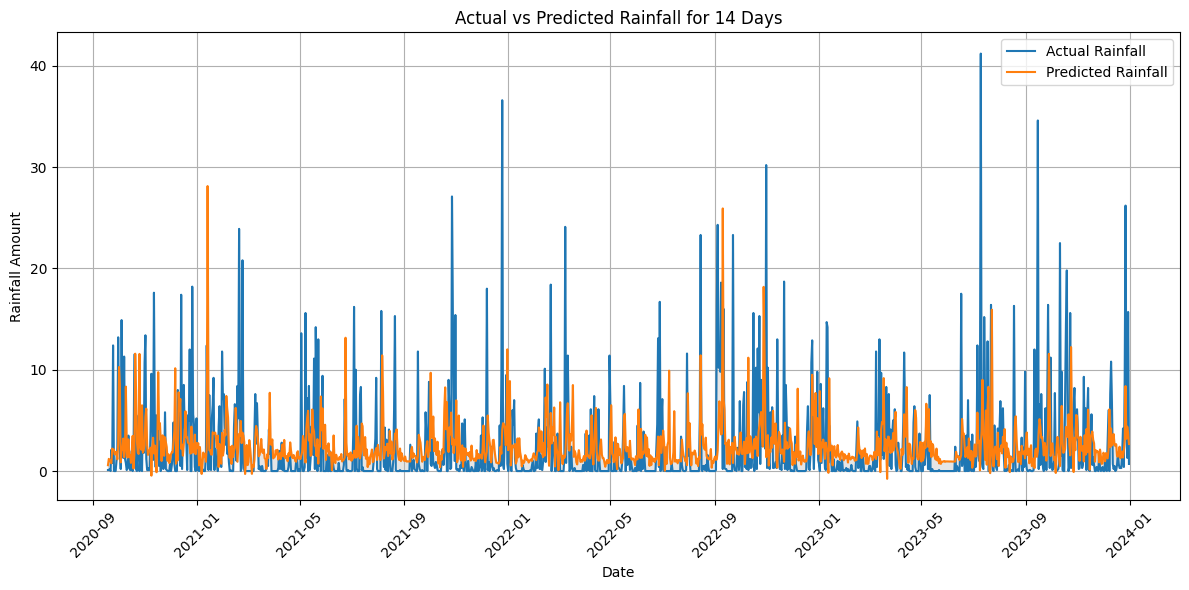


Training and evaluating model with 21 days of previous rain data:


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


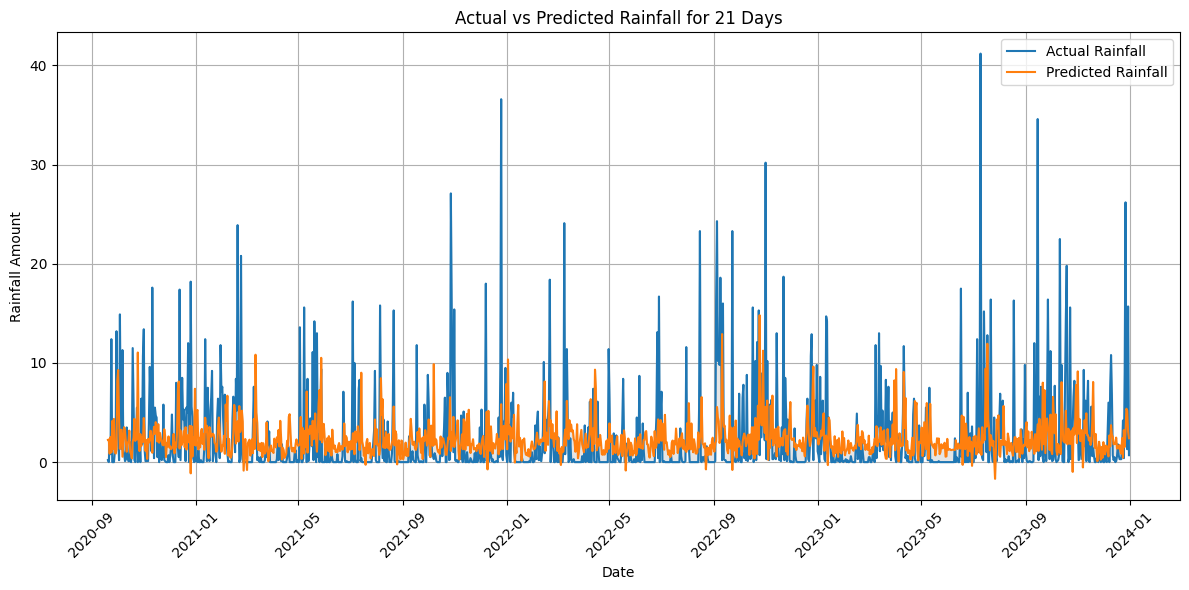


Training and evaluating model with 28 days of previous rain data:


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


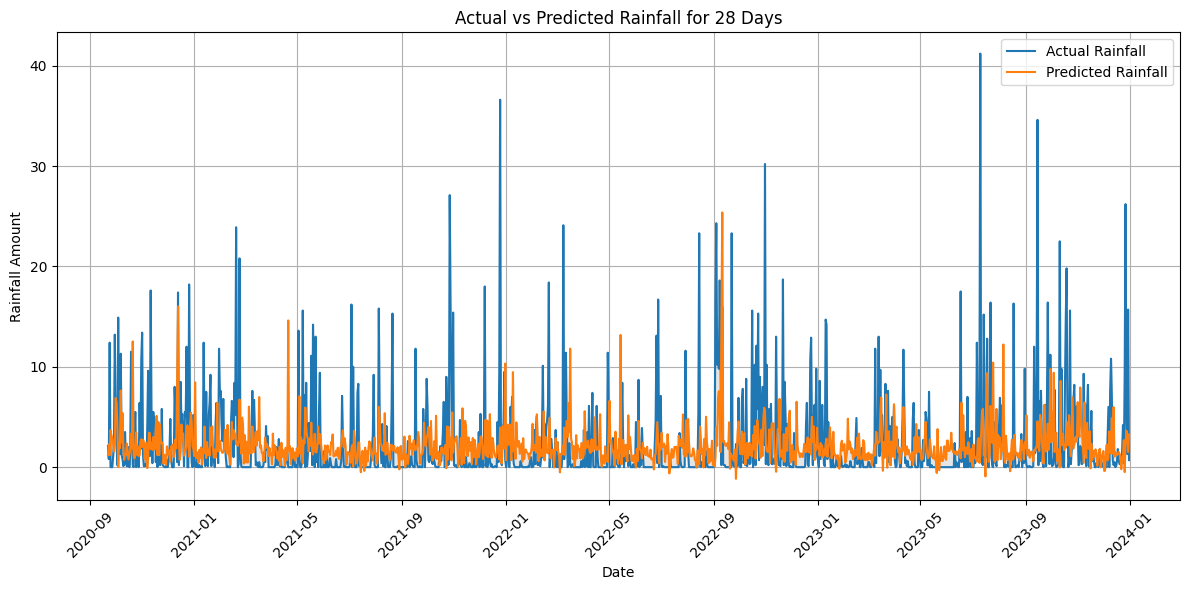

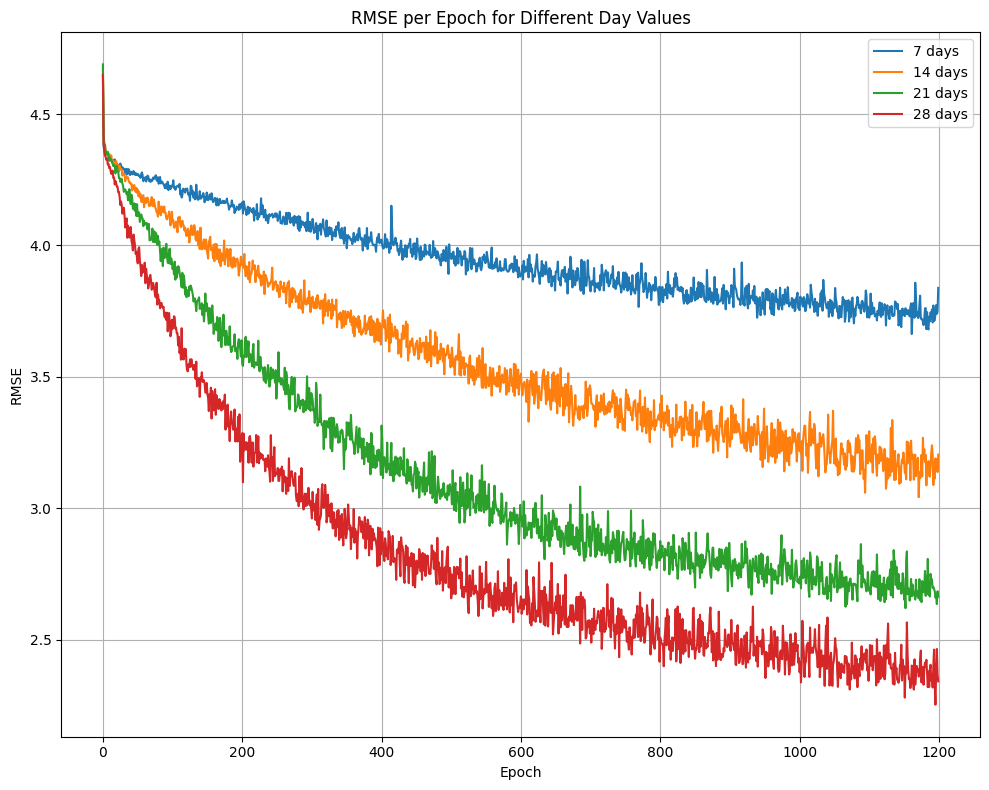

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Initialize a dictionary to store RMSE values for each 'days' value
rmse_per_epoch_per_days = {}

def train_and_evaluate_model(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days+1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train = train_data[features[:-1]]  # Exclude 'date' as it's the index now
    y_train = train_data[target]
    X_test = test_data[features[:-1]]    # Exclude 'date' as it's the index now
    y_test = test_data[target]

    # Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 3: Build the Neural Network Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    # Step 4: Train the Model
    history = model.fit(X_train, y_train, epochs=1200, batch_size=32, verbose=0)

    # Step 5: Evaluate the Model
    y_pred = model.predict(X_test)
    mse_loss = MeanSquaredError()
    mse = mse_loss(y_test, y_pred)
    rmse = tf.sqrt(mse)

    # Store RMSE values for each epoch in the dictionary
    rmse_per_epoch_per_days[days] = np.sqrt(history.history['loss'])

    # Create a DataFrame for easy plotting
    predictions_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Days')
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all RMSE values
def plot_rmse(rmse_per_epoch_per_days):
    plt.figure(figsize=(10, 8))
    for days, rmse_values in rmse_per_epoch_per_days.items():
        plt.plot(rmse_values, label=f'{days} days')

    plt.title('RMSE per Epoch for Different Day Values')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Assuming your DataFrame 'county_cavan' is already loaded and has 'date' and 'rain' columns
# Make sure 'date' column is in datetime format if it's not already
# If not in datetime format, you might need to add a line like:
# county_cavan['date'] = pd.to_datetime(county_cavan['date'])

# Test the function with different numbers of days
for days in [7, 14,21,28]: # Reduced the number of days for brevity in the example
    print(f"\nTraining and evaluating model with {days} days of previous rain data:")
    train_and_evaluate_model(days, county_cavan.copy()) # Pass a copy

# After all models are trained, plot the RMSE values
plot_rmse(rmse_per_epoch_per_days)

Applying Kernel PCA with LSTM


Training and evaluating model with 7 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


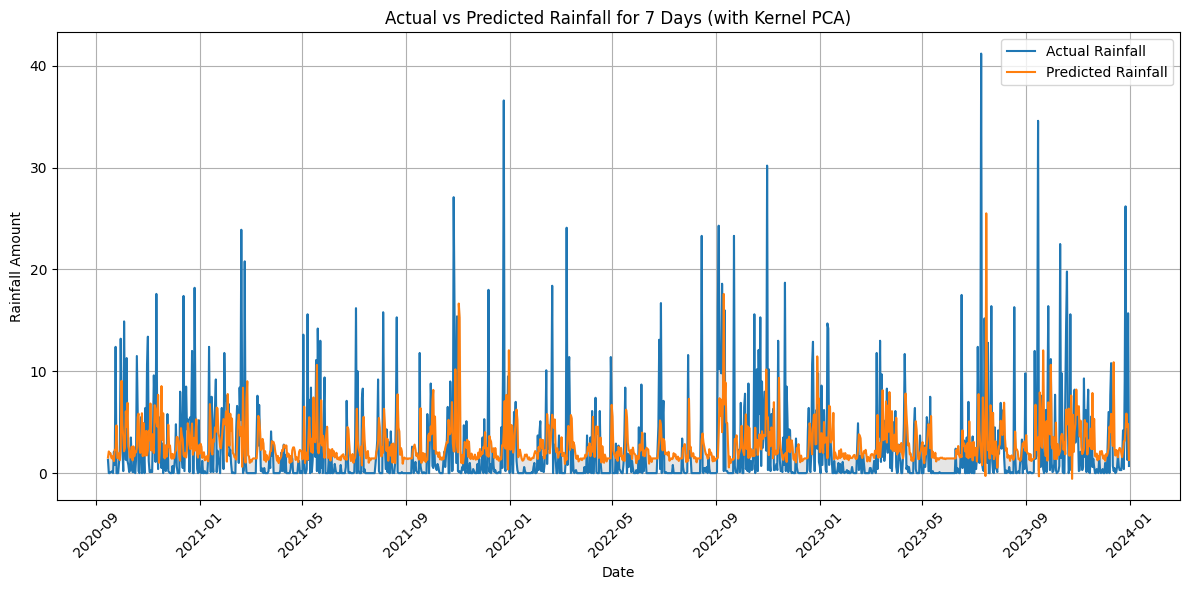


Training and evaluating model with 14 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


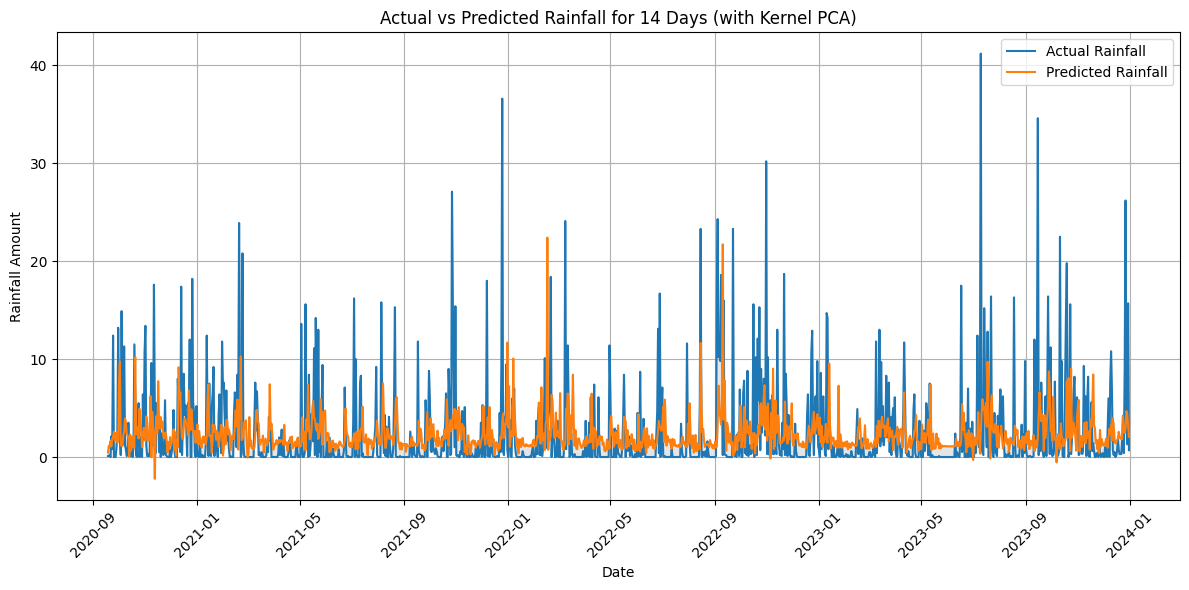


Training and evaluating model with 21 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


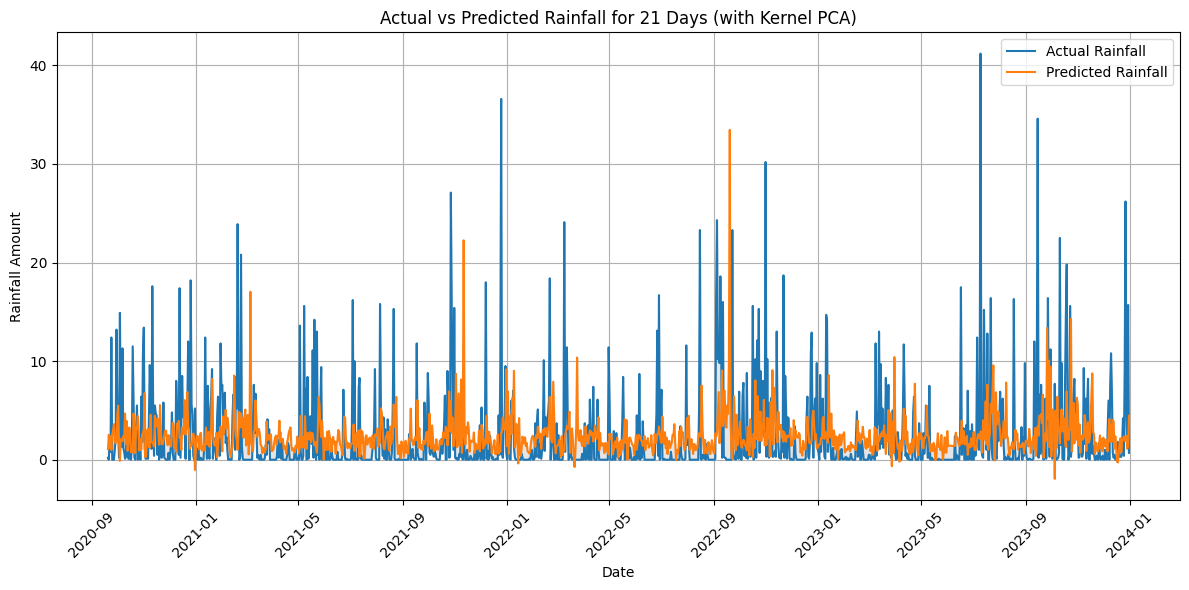


Training and evaluating model with 28 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


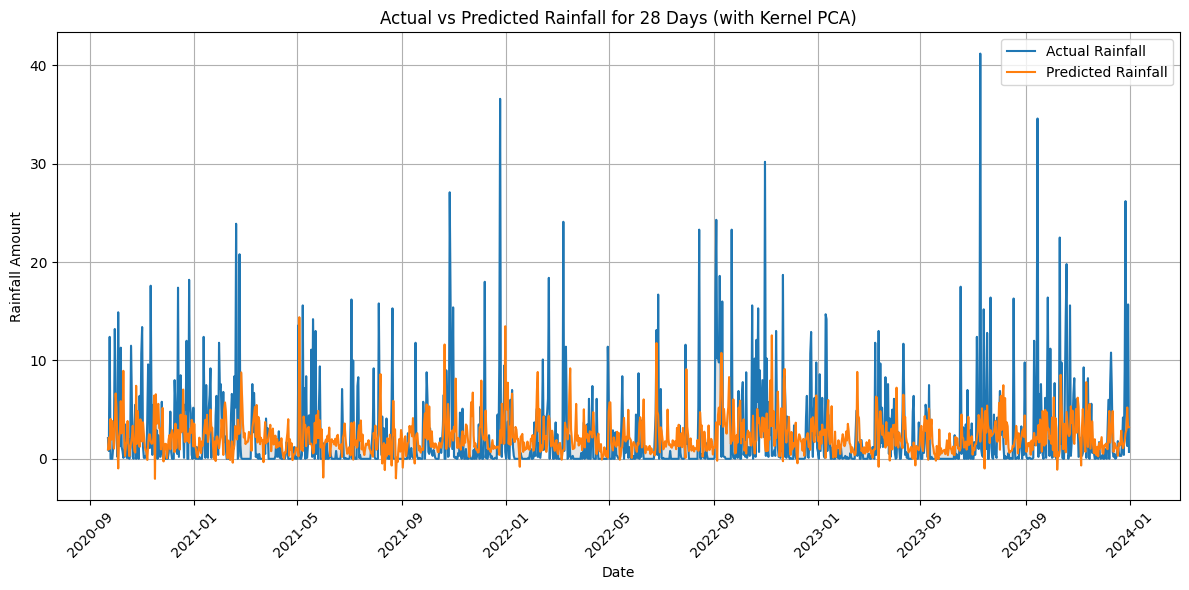

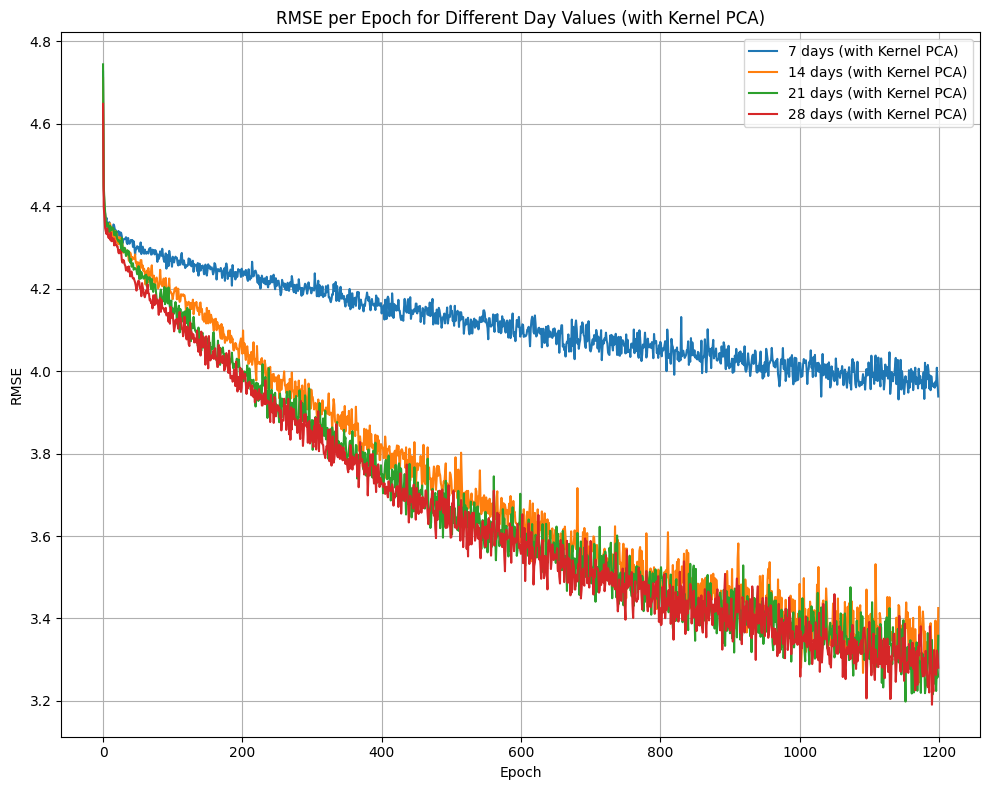

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Initialize a dictionary to store RMSE values for each 'days' value
rmse_per_epoch_per_days = {}

def train_and_evaluate_model(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days+1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train = train_data[features[:-1]]  # Exclude 'date' as it's the index now
    y_train = train_data[target]
    X_test = test_data[features[:-1]]    # Exclude 'date' as it's the index now
    y_test = test_data[target]

    # Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 3: Apply Kernel PCA
    n_components = min(X_train.shape[1], 15) # Choose a reasonable number of components
    kpca = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.1) # You can experiment with different kernels and gamma
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Step 4: Build the Neural Network Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_kpca.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    # Step 5: Train the Model
    history = model.fit(X_train_kpca, y_train, epochs=1200, batch_size=32, verbose=0)

    # Step 6: Evaluate the Model
    y_pred = model.predict(X_test_kpca)
    mse_loss = MeanSquaredError()
    mse = mse_loss(y_test, y_pred)
    rmse = tf.sqrt(mse)

    # Store RMSE values for each epoch in the dictionary
    rmse_per_epoch_per_days[days] = np.sqrt(history.history['loss'])

    # Create a DataFrame for easy plotting
    predictions_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Days (with Kernel PCA)')
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all RMSE values
def plot_rmse(rmse_per_epoch_per_days):
    plt.figure(figsize=(10, 8))
    for days, rmse_values in rmse_per_epoch_per_days.items():
        plt.plot(rmse_values, label=f'{days} days (with Kernel PCA)')

    plt.title('RMSE per Epoch for Different Day Values (with Kernel PCA)')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Test the function with different numbers of days
for days in [7, 14,21,28]: # Reduced the number of days for brevity in the example
    print(f"\nTraining and evaluating model with {days} days of previous rain data (with Kernel PCA):")
    train_and_evaluate_model(days, county_cavan.copy()) # Pass a copy

# After all models are trained, plot the RMSE values
plot_rmse(rmse_per_epoch_per_days)

Using MAE to measure model performance


Training and evaluating model with 7 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


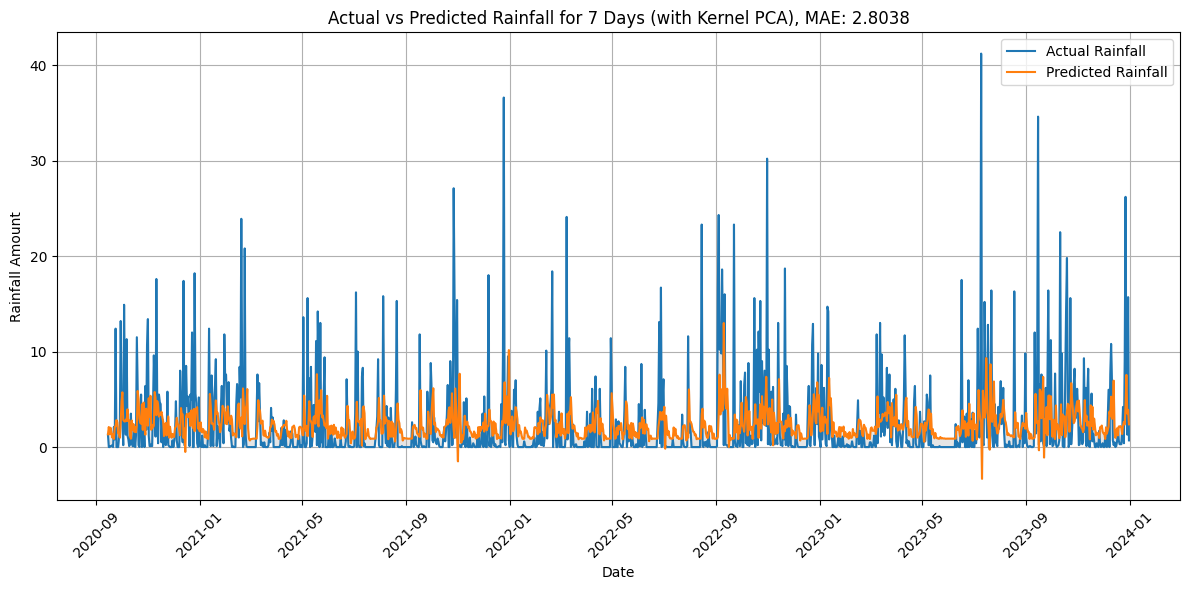


Training and evaluating model with 14 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


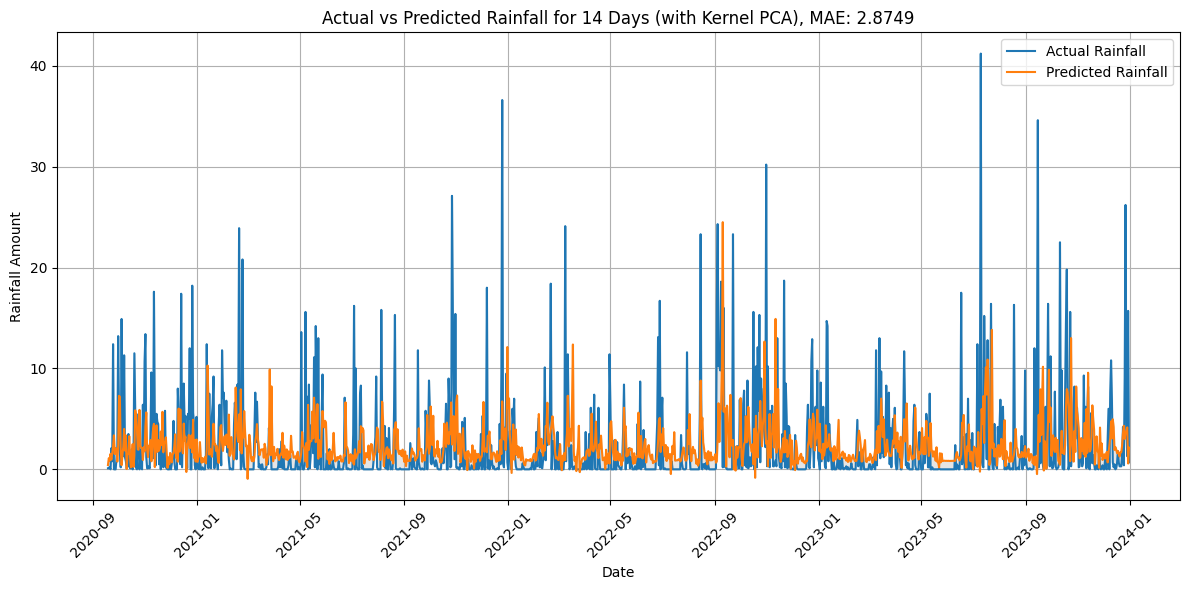


Training and evaluating model with 21 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


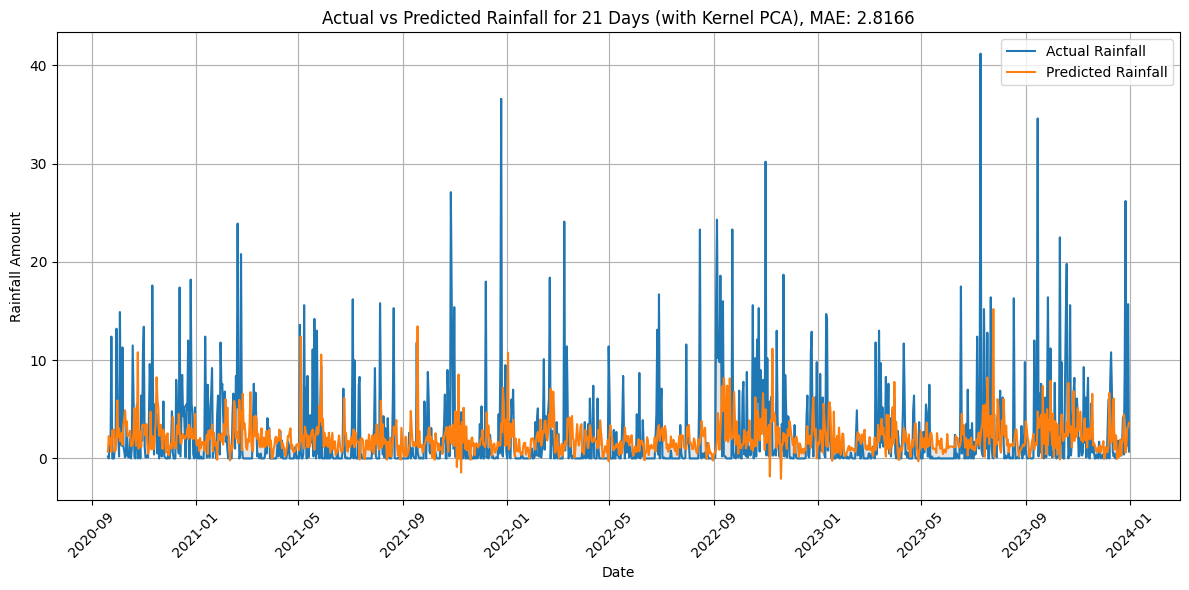


Training and evaluating model with 28 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


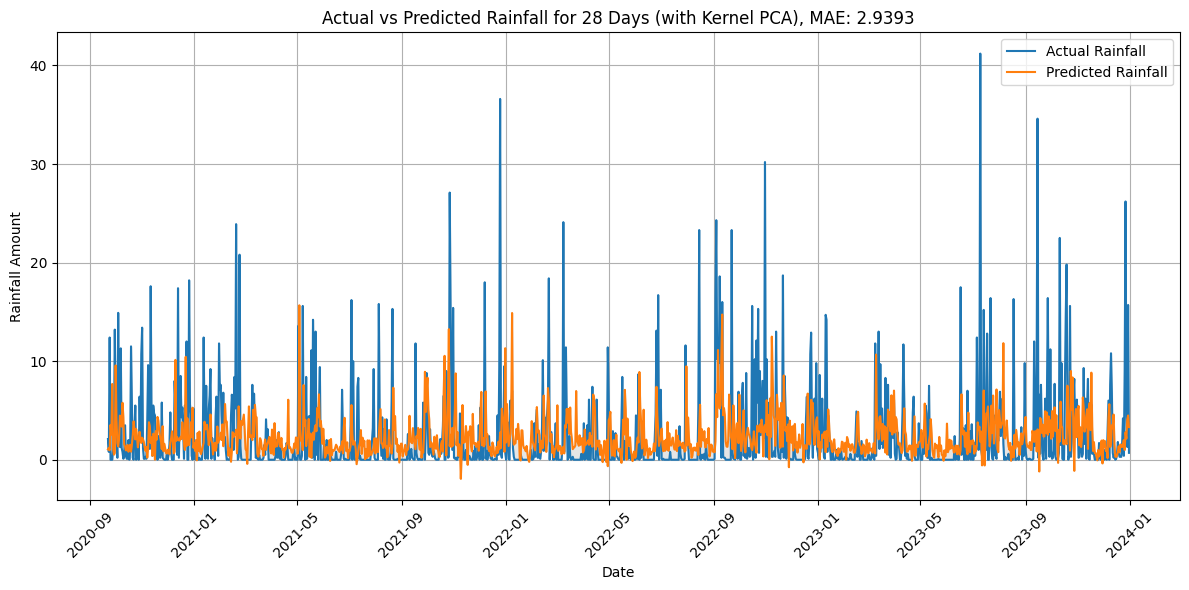

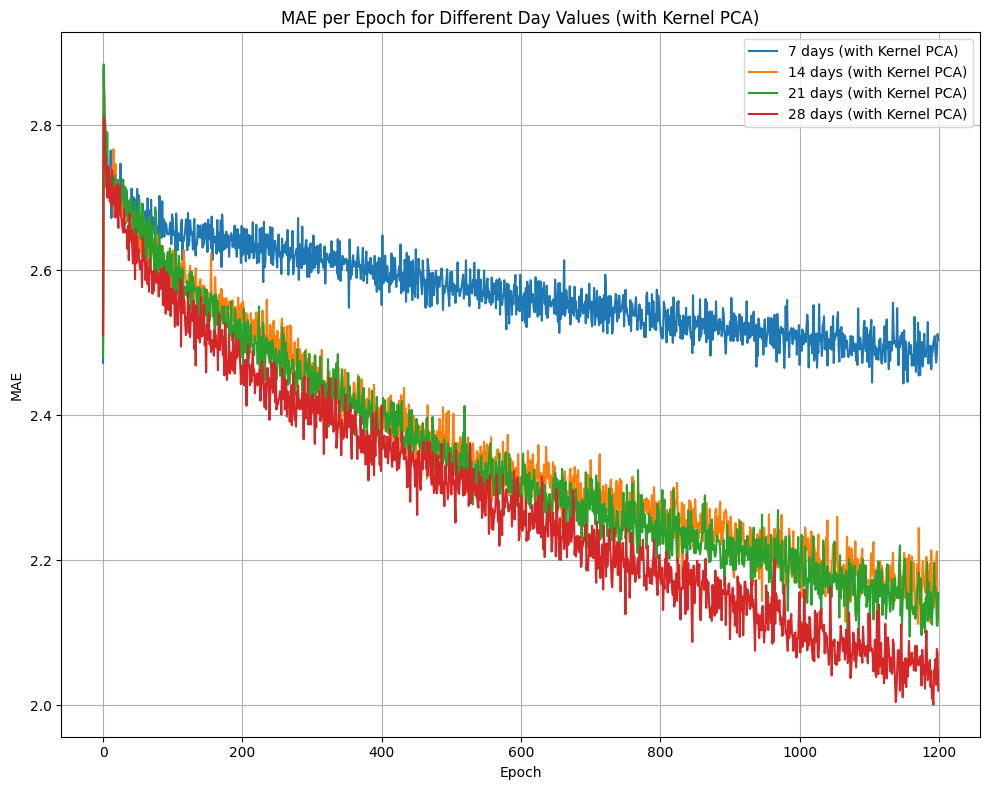

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers
,
,
,
,
,
,